In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as ss
from scipy.stats import norm

In [3]:
df_IDH = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/HDI.csv')
df_VACCINATION = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/country_vaccinations.csv')
df_DEMOCRACY = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/democracy_dictatorship_by_country.csv', sep = ';')

In [4]:
df_IDH.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [5]:
df_VACCINATION.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
86511,Zimbabwe,ZWE,2022-03-29,9039729.0,5053114.0,3510256.0,105369.0,103751.0,59.90,33.48,23.26,6874.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


Abaixo agrupam-se os dados de vacinação por país e 

In [6]:
filter = df_VACCINATION.groupby(['country'])['date'].max().reset_index()
keys = list(filter.columns.values)
i1 = df_VACCINATION.set_index(keys).index
i2 = filter.set_index(keys).index
df_VACCINATION = df_VACCINATION[i1.isin(i2)]
df_VACCINATION

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
393,Afghanistan,AFG,2022-03-22,5751015.0,5082824.0,4420127.0,NaN,6319.0,14.44,12.76,11.10,159.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
832,Albania,ALB,2022-03-24,2754244.0,1278902.0,1215199.0,NaN,1821.0,95.87,44.52,42.30,634.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1237,Algeria,DZA,2022-03-09,13704895.0,7461932.0,6110712.0,NaN,4307.0,30.72,16.72,13.70,97.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",World Health Organization,https://covid19.who.int/
1650,Andorra,AND,2022-03-13,151997.0,57817.0,53367.0,NaN,34.0,196.50,74.74,68.99,440.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/
2040,Angola,AGO,2022-03-25,17535411.0,11235059.0,5993792.0,NaN,34171.0,51.68,33.11,17.66,1007.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85073,Wales,OWID_WLS,2022-03-28,6927437.0,2528664.0,2399341.0,2254.0,1609.0,218.53,79.77,75.69,508.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...
85444,Wallis and Futuna,WLF,2022-03-28,13073.0,NaN,NaN,NaN,19.0,117.84,NaN,NaN,1713.0,Moderna,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
85756,Yemen,YEM,2022-03-16,807502.0,643501.0,404781.0,NaN,2271.0,2.65,2.11,1.33,74.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinovac",World Health Organization,https://covid19.who.int/
86106,Zambia,ZMB,2022-03-29,3402612.0,NaN,2182849.0,12073.0,13650.0,17.98,NaN,11.54,721.0,"Johnson&Johnson, Oxford/AstraZeneca, Sinopharm...",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...


<h1><b> Analise Exploratoria dos Dados </b></h1>

## Gerando dataframe Vacinação e IDH

A partir de uma regressão linear tentarei responder se é possível prever a taxa de vacinação de um país a partir de seu IDH

In [7]:
df_IDH = df_IDH[['HDI Rank', 'Country', '2019' ]]
df_IDH

,HDI Rank,Country,2019
0,169,Afghanistan,0.511
1,69,Albania,0.795
2,91,Algeria,0.748
3,36,Andorra,0.868
4,148,Angola,0.581
...,...,...,...
184,113,Venezuela (Bolivarian Republic of),0.711
185,117,Viet Nam,0.704
186,179,Yemen,0.470
187,146,Zambia,0.584


In [8]:
temp = df_VACCINATION.merge(df_IDH, 
             how = "inner",
             left_on = "country", right_on = "Country")
temp = temp[['country', 'people_fully_vaccinated_per_hundred', '2019']]
temp

,country,people_fully_vaccinated_per_hundred,2019
0,Afghanistan,11.10,0.511
1,Albania,42.30,0.795
2,Algeria,13.70,0.748
3,Andorra,68.99,0.868
4,Angola,17.66,0.581
...,...,...,...
162,Uzbekistan,40.82,0.720
163,Vanuatu,27.09,0.609
164,Yemen,1.33,0.470
165,Zambia,11.54,0.584


In [9]:
temp = temp.dropna()
temp

,country,people_fully_vaccinated_per_hundred,2019
0,Afghanistan,11.10,0.511
1,Albania,42.30,0.795
2,Algeria,13.70,0.748
3,Andorra,68.99,0.868
4,Angola,17.66,0.581
...,...,...,...
162,Uzbekistan,40.82,0.720
163,Vanuatu,27.09,0.609
164,Yemen,1.33,0.470
165,Zambia,11.54,0.584


## Intervalo de confiança - Relação IDH alto x Taxa de vacinação
Nesta sessão foi feito o teste de hipótese para verificar a relação do IDH com a taxa de vacinação. Assim foi definida a hipótese nula $h_o$ e a hipótese alternativa $h_1$.

$h_0$: Países com IDH alto (maior ou igual a 0.7) não tendem a ter uma taxa de vacinação diferente dos países com IDH baixo.

$h_1$: Países com IDH alto (maior ou igual a 0.7) tendem a ter uma maior taxa de vacinação.

In [51]:
high = temp['2019'] >= 0.7
low = temp['2019'] < 0.7
N = 20000

size_high = len(temp[high]['people_fully_vaccinated_per_hundred'])
size_low = len(temp[low]['people_fully_vaccinated_per_hundred'])

data_high = temp[high]['people_fully_vaccinated_per_hundred']
data_low = temp[low]['people_fully_vaccinated_per_hundred']

values_high = np.zeros(N)
values_low = np.zeros(N)
for i in range(N):
    sample_high = data_high.sample(size_high, replace = True)
    sample_low = data_low.sample(size_low, replace = True)
    values_high[i] = sample_high.mean()
    values_low[i] = sample_low.mean()
print("IC IDH alto vai de %d ate %d\n" % (np.percentile(values_high, 2.5), np.percentile(values_high, 97.5)))
print("IC IDH baixo vai de %d ate %d\n" % (np.percentile(values_low, 2.5), np.percentile(values_low, 97.5)))

IC IDH alto vai de 57 ate 64

IC IDH baixo vai de 19 ate 30



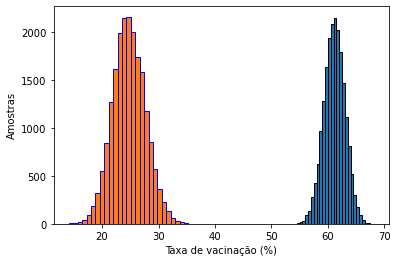

In [66]:
plt.hist(values_high, bins=30, edgecolor='k')
plt.hist(values_low, bins=30, edgecolor='b')
plt.xlabel('Taxa de vacinação (%)')
plt.ylabel('Amostras')
plt.show()

Como em apenas 1% dos casos a diferença entre as taxas de vacinação foi maior que a diferença entre as médias reais, rejeita-se a hipotése nula e $h_1$ é aceita.

## Intervalo de confiança: relação Ditaduras x Taxa de vacinação

In [55]:
df_DEMOCRACY.head()

,Country_Code,Country_Name,Population,Type,Subtype
0,ALB,Albania,2878420,Democracy,1. Parliamentary Democracy
1,AND,Andorra,77240,Democracy,1. Parliamentary Democracy
2,ATG,Antigua and Barbuda,97764,Democracy,1. Parliamentary Democracy
3,AUS,Australia,25439164,Democracy,1. Parliamentary Democracy
4,BHS,Bahamas,392477,Democracy,1. Parliamentary Democracy


Cruzando base de dados de vacinação e sobre regimes de governo:

In [56]:
df_DEMOCRACY = df_DEMOCRACY[['Country_Name', 'Type']]
Vac_and_dem = df_VACCINATION.merge(df_DEMOCRACY, 
             how = "inner",
             left_on = "country", right_on = "Country_Name")
Vac_and_dem = Vac_and_dem[['country', 'people_fully_vaccinated_per_hundred', 'Country_Name', 'Type']]
Vac_and_dem.dropna()
Vac_and_dem

,country,people_fully_vaccinated_per_hundred,Country_Name,Type
0,Afghanistan,11.10,Afghanistan,Dictatorship
1,Albania,42.30,Albania,Democracy
2,Algeria,13.70,Algeria,Dictatorship
3,Andorra,68.99,Andorra,Democracy
4,Angola,17.66,Angola,Dictatorship
...,...,...,...,...
174,Venezuela,49.77,Venezuela,Dictatorship
175,Vietnam,79.20,Vietnam,Dictatorship
176,Yemen,1.33,Yemen,Dictatorship
177,Zambia,11.54,Zambia,Dictatorship


Teste de permutação:

In [74]:
filtro = Vac_and_dem['Type'] == 'Dictatorship'
data_dem = Vac_and_dem[~filtro]['people_fully_vaccinated_per_hundred']
data_dic = Vac_and_dem[filtro]['people_fully_vaccinated_per_hundred']
N = 20000

size_dem = len(data_dem)
size_dic = len(data_dic)

values_dem = np.zeros(N)
values_dic = np.zeros(N)

for i in range(N):
    sample_dem = data_dem.sample(size_dem, replace=True)
    sample_dic = data_dic.sample(size_dic, replace=True)
    values_dem[i] = sample_dem.mean()
    values_dic[i] = sample_dic.mean()
print("IC Democracias vai de %d ate %d\n" % (np.percentile(values_dem, 2.5), np.percentile(values_dem, 97.5)))
print("IC Ditaduras vai de %d ate %d\n" % (np.percentile(values_dic, 2.5), np.percentile(values_dic, 97.5)))

IC Democracias vai de 50 ate 59

IC Ditaduras vai de 33 ate 46



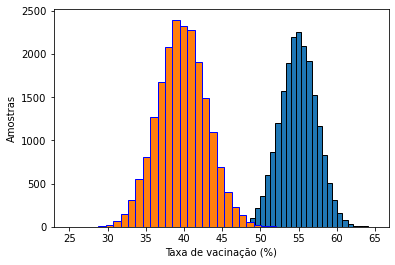

In [75]:
plt.hist(values_dem, bins=30, edgecolor='k')
plt.hist(values_dic, bins=30, edgecolor='b')
plt.xlabel('Taxa de vacinação (%)')
plt.ylabel('Amostras')
plt.show()

Como encontrar o P-Valor neste caso?

## Regressões: IDH x Taxa de vacinação

* Regressão linear simples

In [ ]:
### regressao linear Lucas


from sklearn.linear_model import LinearRegression

X = temp['2019'].values.reshape(-1, 1)   # put your dates in here
y = temp['people_fully_vaccinated_per_hundred'].values.reshape(-1, 1)   # put your kwh in here

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(X, model.predict(X),color='k')
plt.xlabel('IDH')
plt.ylabel('% Vacinação')
plt.title('Regressão linear simples')


yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
r_squared

In [ ]:
#Regressao linear Emyle
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X = temp['2019'].values.reshape(-1,1)
y = temp['people_fully_vaccinated_per_hundred'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

print('Coefficient:', lin_regr.coef_[0][0])
print('Intercept:', lin_regr.intercept_[0])
print('Mean squared error:', mean_squared_error(y_test, y_pred) )
print('R2:', r2_score(y_test, y_pred))

* Regressão Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lasso = GridSearchCV(Lasso(fit_intercept=False),
                     cv = 10,
                     refit = True,
                     param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]})
lasso = lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

print('Mean squared error:', mean_squared_error(y_train, lasso.predict(X_train)))

# Regressão Linear: Coeficiente de GINI x Vacinação


A partir de uma regressão linear tentarei responder se é possível prever a taxa de vacinação de um país a partir de seu Coeficiente de GINI

In [ ]:
df_GINI = pd.read_csv('https://raw.githubusercontent.com/JoaoP-Silva/Covid-analysis/main/gini.csv')

temp2 = df_VACCINATION.merge(df_GINI, 
             how = "inner",
             left_on = "country", right_on = "country")
temp2 = temp2[['country', 'people_fully_vaccinated_per_hundred', '2019']]
temp2 = temp2.dropna()

In [ ]:
X = temp2['2019'].values.reshape(-1, 1)   # put your dates in here
y = temp2['people_fully_vaccinated_per_hundred'].values.reshape(-1, 1)   # put your kwh in here
model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(X, model.predict(X),color='k')
plt.xlabel('GINI')
plt.ylabel('% Vacinação')
plt.title('Regressão linear simples')

yhat = model.predict(X)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
# adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

r_squared

A partir das regressões lineares, observamos que existe uma correlação maior entre taxa de vacinação e o IDH do que entre taxa de vacinação e o coeficiente de GINI.